In [39]:
import pandas as pd
data = pd.read_csv("../data/processed/" + "dataset.csv", low_memory=False)
features, targets = data.drop("price", axis=1), data["price"]

In [40]:
features

,brand,model,transmission,fuelType,year,mileage,tax,mpg,engineSize
0,0,9,1,44,2017,15735,150.0,55.4,1.4
1,0,14,0,40,2016,36203,20.0,64.2,2.0
2,0,9,1,44,2016,29946,30.0,55.4,1.4
3,0,12,0,40,2017,25952,145.0,67.3,2.0
4,0,11,1,44,2019,1998,145.0,49.6,1.0
...,...,...,...,...,...,...,...,...,...
117990,12,57,1,40,2012,74000,125.0,58.9,2.0
117991,12,62,1,44,2008,88102,145.0,46.3,1.2
117992,12,62,1,44,2009,70000,200.0,42.0,1.4
117993,12,62,1,44,2006,82704,150.0,46.3,1.2


In [41]:
import json
with open("../models/parameters.json", "r") as infile:
        params = json.load(infile)

In [42]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(**params)

In [43]:
regr.fit(features, targets)

RandomForestRegressor(bootstrap=False, max_depth=6,
                      max_features=0.28359876180715704, min_samples_leaf=2,
                      min_samples_split=0.02943675068727039, n_estimators=87)

In [44]:
importances = pd.DataFrame([tree.feature_importances_ for tree in regr.estimators_], columns=features.columns)
importances

,brand,model,transmission,fuelType,year,mileage,tax,mpg,engineSize
0,0.011225,0.026332,0.261214,0.009075,0.079360,0.322063,0.009203,0.057473,0.224054
1,0.003352,0.017456,0.008600,0.017396,0.152548,0.007937,0.128884,0.184059,0.479768
2,0.051845,0.011310,0.140390,0.003082,0.464206,0.009714,0.013587,0.017579,0.288286
3,0.029557,0.010907,0.281302,0.038072,0.118111,0.129203,0.010351,0.217949,0.164548
4,0.095719,0.005757,0.183802,0.043989,0.453210,0.000000,0.010866,0.074022,0.132636
...,...,...,...,...,...,...,...,...,...
82,0.039995,0.017717,0.015280,0.001730,0.418053,0.059181,0.033402,0.130807,0.283834
83,0.187993,0.013048,0.193011,0.028587,0.099968,0.117813,0.045777,0.142152,0.171651
84,0.048112,0.015032,0.034438,0.005852,0.442552,0.002926,0.051252,0.088495,0.311341
85,0.067745,0.014501,0.041262,0.000893,0.300402,0.011377,0.026314,0.201859,0.335647


<AxesSubplot:xlabel='variable', ylabel='value'>

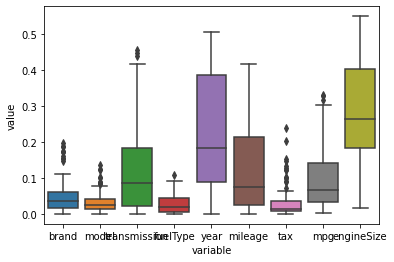

In [45]:
import seaborn as sns
sns.boxplot(x="variable", y="value", data=pd.melt(importances))